In [241]:
#!pip install streamlit

In [242]:

import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [243]:
@st.cache_data
def load_renttherunway():
    url = "https://mcauleylab.ucsd.edu/public_datasets/data/renttherunway/renttherunway_final_data.json.gz"
    return pd.read_json(url, compression="gzip", lines=True)

#rent_the_runway_final_data = load_renttherunway()
#rent_the_runway_final_data.head()

2025-12-04 13:54:46.173 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [244]:
# Load the dataset from JSON file (JSON Lines format)
rent_the_runway_final_data = pd.read_json('renttherunway_final_data.json', lines=True)
rent_the_runway_final_data.head()
#rent_the_runway_final_data['review_summary'][rent_the_runway_final_data['review_summary'].notna()].head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [245]:
rent_the_runway_final_data.columns = (
    rent_the_runway_final_data.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)
rent_the_runway_final_data.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

--- 

In [246]:
def parse_weight(w):
    if isinstance(w, str):
        return int(w.replace('lbs', ''))
    return w

def parse_height(h):
    if isinstance(h, str) and "'" in h:
        feet, inches = h.split("' ")
        inches = inches.replace('"', '')
        return (int(feet) * 12) + int(inches)
    return h

In [247]:
# Data cleaning and preparation for rent_the_runway_final_data

# 1. Remove duplicates
rent_the_runway_final_data = rent_the_runway_final_data.drop_duplicates()


# 2. Drop rows with missing essential values
essential_cols = ['item_id', 'review_text', 'rating']
rent_the_runway_final_data = rent_the_runway_final_data.dropna(subset=essential_cols)

# Apply the cleaning
rent_the_runway_final_data['weight_num'] = rent_the_runway_final_data['weight'].apply(parse_weight)
rent_the_runway_final_data['height_num'] = rent_the_runway_final_data['height'].apply(parse_height)

rent_the_runway_final_data['weight_num'] = pd.to_numeric(rent_the_runway_final_data['weight'].apply(parse_weight), errors='coerce')
rent_the_runway_final_data['height_num'] = pd.to_numeric(rent_the_runway_final_data['height'].apply(parse_height), errors='coerce')

# 3. Fill missing values in less critical columns
rent_the_runway_final_data['category'] = rent_the_runway_final_data['category'].fillna('unknown')
rent_the_runway_final_data['bust_size'] = rent_the_runway_final_data['bust_size'].fillna('unknown')
rent_the_runway_final_data['body_type'] = rent_the_runway_final_data['body_type'].fillna('unknown')
rent_the_runway_final_data['height'] = rent_the_runway_final_data['height'].fillna('unknown')
rent_the_runway_final_data['review_summary'] = rent_the_runway_final_data['review_summary'].fillna('unknown')
rent_the_runway_final_data['rented_for'] = rent_the_runway_final_data['rented_for'].fillna('unknown')

# Apply the cleaning
rent_the_runway_final_data['weight_num'] = rent_the_runway_final_data['weight'].apply(parse_weight)
rent_the_runway_final_data['height_num'] = rent_the_runway_final_data['height'].apply(parse_height)

# For numerical columns, fill missing values with median
for col in ['size', 'age']:
    rent_the_runway_final_data[col] = rent_the_runway_final_data[col].fillna(rent_the_runway_final_data[col].median())

# 4. Strip whitespace from string columns
string_cols = ['review_text', 'category', 'bust_size', 'body_type', 'height', 'weight', 'review_summary', 'rented_for']
for col in string_cols:
    rent_the_runway_final_data[col] = rent_the_runway_final_data[col].astype(str).str.strip()

rent_the_runway_final_data['rating'] = rent_the_runway_final_data['rating'] / 2

# 5. Reset index after cleaning
rent_the_runway_final_data = rent_the_runway_final_data.reset_index(drop=True)

In [248]:
# Display cleaned dataframe summary
rent_the_runway_final_data.head()

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0  fit   420272       34d  2260466  137lbs     5.0       vacation   
1  fit   273551       34b   153475  132lbs     5.0          other   
2  fit   360448   unknown  1063761     nan     5.0          party   
3  fit   909926       34c   126335  135lbs     4.0  formal affair   
4  fit   151944       34b   616682  145lbs     5.0        wedding   

                                         review_text          body_type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...            unknown   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3    Dress arrived on time and in perfect condition.    dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  weight_num height_num  
0   28.0      April 20, 2016       137.0         68  
1   36.0       June 18, 2013       132.0         66  
2  116.0   December 14, 2015         NaN         64  
3   34.0   February 12, 2014       135.0         65  
4   27.0  September 26, 2016       145.0         69

--- 

# Data Visualization

In [249]:
rent_the_runway_visualization = rent_the_runway_final_data.copy()

---
### EDA for Rent The Runway

In [250]:
# Set a consistent template and color palette
plotly_template = "plotly_white"
color_sequence = px.colors.qualitative.Set2
font_family = "Arial"
fig_width = 1000
fig_height = 500

# Group 1: Reviews & Ratings

In [251]:
rent_the_runway_visualization.value_counts('rating').head(20)

rating
5.0    124413
4.0     53340
3.0     10688
2.0      2787
1.0      1046
Name: count, dtype: int64

In [ ]:
# 1. Prepare the Data
# Ensure date column is in datetime format for the time series plot
rent_the_runway_visualization['review_date'] = pd.to_datetime(rent_the_runway_visualization['review_date'])
# --- Visualization 1: Distribution of Ratings (Histogram) ---
fig1 = px.histogram(
    rent_the_runway_visualization,
    x='rating',
    nbins=10,
    title='Distribution of Customer Ratings',
    labels={'rating': 'Rating (1-5)'},
    color='rating',  # Color bars by rating value
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Use a colorful palette
    template=plotly_template
)
fig1.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    xaxis=dict(showgrid=True, gridcolor='lightgray', dtick=1),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig1.update_traces(marker_line_width=1, marker_line_color='black')
fig1.show()

# --- Visualization 2: Ratings by Occasion (Box Plot) ---
fig2 = px.box(
    rent_the_runway_visualization, 
    x='rented_for', 
    y='rating', 
    color='rented_for',
    title='Distribution of Ratings by Occasion',
    labels={'rented_for': 'Occasion', 'rating': 'Rating'},
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig2.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig2.show()

# --- Visualization 3: Average Rating over Time (Line Chart) ---
# Aggregate data by month to smooth out the trend
df_monthly_rating = (
    rent_the_runway_visualization
    .set_index('review_date')['rating']
    .resample('M')
    .mean()
    .reset_index()
)
fig3 = px.line(
    df_monthly_rating, 
    x='review_date', 
    y='rating', 
    title='Average Rating Trend Over Time',
    markers=True,
    labels={'review_date': 'Date', 'rating': 'Average Rating'},
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig3.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig3.show()

C:\Users\junio\AppData\Local\Temp\ipykernel_36480\1240154421.py:50: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# --- Visualization 4: Top 20 Most Popular Categories (Horizontal Bar Chart) ---
# 1. Prepare the data: Count occurrences of each category and take top 20
top_categories = (
    rent_the_runway_visualization['category']
    .value_counts()
    .head(20)
    .reset_index()
)
top_categories.columns = ['category', 'count'] # Rename columns for cleaner plotting
fig4 = px.bar(
    top_categories,
    x='count',
    y='category',
    orientation='h',
    title='Top 20 Most Popular Categories',
    labels={'count': 'Number of Rentals', 'category': 'Category'},
    color='count',
    color_continuous_scale=px.colors.sequential.Blues,
    text='count',
    template=plotly_template
)
fig4.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    yaxis=dict(autorange="reversed", showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig4.show()

# --- Visualization 5: Category vs. Occasion Hierarchy (Treemap) ---
# 1. Prepare the data: Aggregate counts by 'rented_for' and 'category'
treemap_data = (
    rent_the_runway_visualization
    .groupby(['rented_for', 'category'])
    .size()
    .reset_index(name='count')
)
fig5 = px.treemap(
    treemap_data,
    path=['rented_for', 'category'],
    values='count',
    title='Inventory Hierarchy: Categories within Occasions',
    color='rented_for',
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig5.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16)
)
fig5.show()


In [ ]:
# --- Visualization 6: Age vs. Body Type (Violin Plot) ---

# Drop rows where height or weight couldn't be parsed (for cleaner plots)
df_clean_body = rent_the_runway_visualization.dropna(subset=['weight_num', 'height_num', 'age'])
fig6 = px.violin(
    df_clean_body,
    x='body_type',
    y='age',
    box=True,
    title='Age Distribution by Body Type',
    labels={'body_type': 'Body Type', 'age': 'Age'},
    color='body_type',
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig6.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig6.show()

# --- Visualization 7: Height vs. Weight Correlation (Scatter Plot) ---
fig7 = px.scatter(
    df_clean_body,
    x='weight_num',
    y='height_num',
    color='body_type',
    title='Height vs. Weight Correlation',
    labels={'weight_num': 'Weight (lbs)', 'height_num': 'Height (inches)', 'body_type': 'Body Type'},
    opacity=0.6,
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig7.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    xaxis=dict(range=[80, 300], showgrid=True, gridcolor='lightgray'),
    yaxis=dict(range=[50, 80], showgrid=True, gridcolor='lightgray')
)
fig7.show()

# --- Visualization 8: Body Type Distribution (Treemap) ---
# Count the body types
body_type_counts = df_clean_body['body_type'].value_counts().reset_index()
body_type_counts.columns = ['body_type', 'count']
fig8 = px.treemap(
    body_type_counts,
    path=['body_type'],
    values='count',
    title='Distribution of User Body Types',
    color='body_type',
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig8.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16)
)
fig8.show()


In [ ]:
# --- Visualization 9: Fit Feedback by Body Type (Sunburst Chart) ---
# 1. Prepare the data: Group by 'body_type' and 'fit' to get counts
fit_feedback = (
    rent_the_runway_visualization
    .groupby(['body_type', 'fit'])
    .size()
    .reset_index(name='count')
)

# --- Visualization 9: Fit Feedback by Body Type (Stacked Bar Chart) ---
fig9 = px.bar(
    fit_feedback,
    x='body_type',
    y='count',
    color='fit',
    title='Fit Feedback Breakdown by Body Type',
    labels={'body_type': 'Body Type', 'count': 'Count', 'fit': 'Fit Feedback'},
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig9.update_layout(
    barmode='stack',
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16)
)
fig9.show()

# --- Visualization 10: Size Range by Category (Box Plot) ---
top_20_categories = rent_the_runway_visualization['category'].value_counts().head(20).index
df_top_categories = rent_the_runway_visualization[rent_the_runway_visualization['category'].isin(top_20_categories)]
fig10 = px.box(
    df_top_categories,
    x='category',
    y='size',
    title='Size Range Distribution by Top 20 Categories',
    labels={'category': 'Category', 'size': 'Size'},
    color='category',
    color_discrete_sequence=color_sequence,
    template=plotly_template
)
fig10.update_layout(
    width=fig_width,
    height=fig_height,
    font=dict(family=font_family, size=16),
    showlegend=False,
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig10.show()

In [ ]:
from textblob import TextBlob

import plotly.express as px

# Take a sample of text reviews
sample_reviews = rent_the_runway_visualization.sample(n=10000, random_state=42)

# Compute sentiment polarity for each review in the sample
sample_reviews['sentiment'] = sample_reviews['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Interactive histogram of sentiment polarity
fig_sentiment = px.histogram(
        sample_reviews,
        x='sentiment',
        nbins=50,
        title='Sentiment Analysis of Review Texts',
        labels={'sentiment': 'Sentiment Polarity'},
        template=plotly_template,
        width=fig_width,
        height=fig_height,
        color=sample_reviews['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative'),
        color_discrete_map={'Positive': 'green', 'Negative': 'red'}
    )
fig_sentiment.update_layout(
    font=dict(family=font_family, size=16),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig_sentiment.show()

In [ ]:
from textblob import TextBlob

# Sentiment analysis and treemap visualization for review_text

import plotly.express as px
# Take a sample of text reviews
sample_reviews = rent_the_runway_visualization.sample(n=10000, random_state=42)

# Compute sentiment polarity for each review in the sample
sample_reviews['sentiment'] = sample_reviews['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify reviews as positive, negative, or neutral
def sentiment_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

sample_reviews['sentiment_label'] = sample_reviews['sentiment'].apply(sentiment_label)

# Aggregate counts by sentiment label and occasion
sentiment_treemap_data = (
    sample_reviews
    .groupby(['sentiment_label', 'rating'])
    .size()
    .reset_index(name='count')
)

# Plot treemap
fig_sentiment_treemap = px.treemap(
    sentiment_treemap_data,
    path=['sentiment_label', 'rating'],
    values='count',
    title='Treemap of Positive and Negative Feelings by Rating',
    color='sentiment_label',
    color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'},
    template=plotly_template,
    width=fig_width,
    height=fig_height
)
fig_sentiment_treemap.update_layout(font=dict(family=font_family, size=16))
fig_sentiment_treemap.show()

---
# Content-Based Recommender System

In [258]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [259]:
rent_the_runway_final_data['review_text'].head()

0    An adorable romper! Belt and zipper were a lit...
1    I rented this dress for a photo shoot. The the...
2    This hugged in all the right places! It was a ...
3    I rented this for my company's black tie award...
4    I have always been petite in my upper body and...
Name: review_text, dtype: object

In [260]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
rent_the_runway_final_data['review_text'] = rent_the_runway_final_data['review_text'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(rent_the_runway_final_data['review_text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(192274, 28002)

In [261]:
tfidf.get_feature_names_out()[1000:1010]

array(['65f', '65th', '65yoa', '66', '67', '675', '67th', '68', '68th',
       '69'], dtype=object)

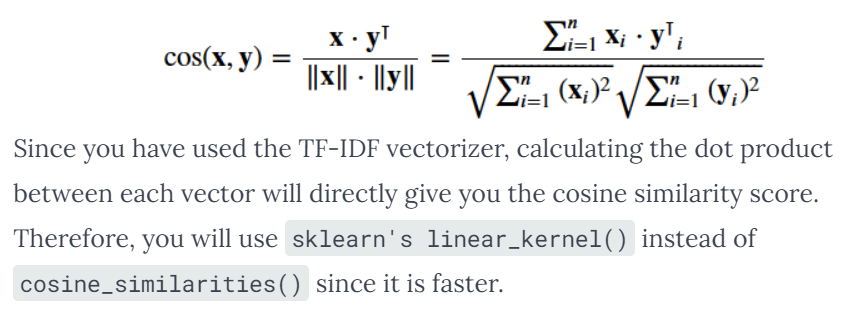

In [262]:
from IPython.display import Image
Image(filename =r'Im2.png')

In [263]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix[:25000], tfidf_matrix[:25000])
cosine_sim.shape

(25000, 25000)

In [264]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(rent_the_runway_final_data.index, index=rent_the_runway_final_data['item_id']).drop_duplicates()

In [265]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # If idx is a Series (multiple indices), filter out values >= 25000
    if isinstance(idx, (np.ndarray, list, pd.Series)):
        idx = [i for i in idx if i < 25000]
        if not idx:
            raise ValueError("No valid indices found below 25000.")
        idx = idx[0]  # Use the first valid index
    elif idx >= 25000:
        raise ValueError("Index is >= 25000 and not allowed.")


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]


    # Return the top 5 most similar movies
    return rent_the_runway_final_data['item_id'].iloc[movie_indices]

In [266]:
rent_the_runway_final_data['item_id'].iloc[1:10]

1     153475
2    1063761
3     126335
4     616682
5     364092
6     568429
7     130259
8    1729232
9    1729232
Name: item_id, dtype: int64

In [267]:
get_recommendations(1729232)

8005      369599
18273     166006
7567      166633
13703    1414833
19258     131533
Name: item_id, dtype: int64

# SOUP Recommender

In [268]:
rent_the_runway_final_data.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date', 'weight_num', 'height_num'],
      dtype='object')

In [269]:
rent_features_soup = rent_the_runway_final_data[['fit', 'bust_size', 'weight', 'rented_for', 'body_type', 'review_summary', 'category','height', 'size', 'age']].copy()

In [270]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [271]:
features = ['fit', 'bust_size', 'weight', 'rented_for', 'body_type', 'category','height', 'size', 'age']
for feature in features:
    rent_features_soup[feature] = rent_features_soup[feature].apply(clean_data)

In [272]:
def create_soup(x):
    return ' '.join([
        str(x['fit']) + ' ',
        str(x['bust_size']) + ' ',
        str(x['weight']) + ' ',
        str(x['rented_for']) + ' ',
        str(x['body_type']) + ' ',
        str(x['category']) + ' ',
        str(x['height']) + ' ',
        str(x['size']) + ' ',
        str(x['age']) + ' '
    ])

In [273]:
# Create a new soup feature
rent_features_soup['soup'] = rent_features_soup.apply(create_soup, axis = 1)
rent_features_soup['soup'].head()

0    fit  34d  137lbs  vacation  hourglass  romper ...
1    fit  34b  132lbs  other  straight&narrow  gown...
2    fit  unknown  nan  party  unknown  sheath  5'4...
3    fit  34c  135lbs  formalaffair  pear  dress  5...
4    fit  34b  145lbs  wedding  athletic  gown  5'9...
Name: soup, dtype: object

In [274]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(rent_features_soup['soup'])

In [275]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix[:25000], count_matrix[:25000])

In [276]:
# Content based Filtering
get_recommendations(1729232, cosine_sim2)

484      154002
4856     152662
5146     128959
6926     131117
7968    1043198
Name: item_id, dtype: int64

# Content Based Filtering 

In [277]:
rent_the_runway_content_based_filtering = rent_the_runway_final_data[['user_id', 'item_id', 'rating', 'review_date']].copy()
rent_the_runway_content_based_filtering.head()

user_id  item_id  rating         review_date
0   420272  2260466     5.0      April 20, 2016
1   273551   153475     5.0       June 18, 2013
2   360448  1063761     5.0   December 14, 2015
3   909926   126335     4.0   February 12, 2014
4   151944   616682     5.0  September 26, 2016

In [278]:
# Convert 'review_date' in rent_the_runway_content_based_filtering to datetime for sorting
rent_the_runway_content_based_filtering['review_date'] = pd.to_datetime(
    rent_the_runway_content_based_filtering['review_date'], errors='coerce'
)
rent_the_runway_content_based_filtering.head()

user_id  item_id  rating review_date
0   420272  2260466     5.0  2016-04-20
1   273551   153475     5.0  2013-06-18
2   360448  1063761     5.0  2015-12-14
3   909926   126335     4.0  2014-02-12
4   151944   616682     5.0  2016-09-26

## Transforming data into the matrix

Next, we transform the dataset into a matrix where each row represents the user and column represents the item.

The n_users defines the number of users whereas n_items defines the number of items in the dataset. The loop iterates through each row of the dataframe and extracts ratings from it to form the user-item rating matrix.

In [279]:
n_users = rent_the_runway_content_based_filtering['user_id'].nunique()
n_items = rent_the_runway_content_based_filtering['item_id'].nunique()


# Initialize an empty user-item rating matrix with zeros
# Rows = users, Columns = items
A = np.zeros((n_users, n_items))

user_to_idx = {user_id: idx for idx, user_id in enumerate(rent_the_runway_content_based_filtering['user_id'].unique())}
product_to_idx = {product_id: idx for idx, product_id in enumerate(rent_the_runway_content_based_filtering['item_id'].unique())}

for row in rent_the_runway_content_based_filtering.itertuples():
    user_idx = user_to_idx[row.user_id]
    product_idx = product_to_idx[row.item_id]
    A[user_idx, product_idx] = row.rating

# Display the original user-item rating matrix
print("Original rating matrix:\n", A)

Original rating matrix:
 [[5. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [280]:
A.shape

(105508, 5850)

In [281]:
# Loop through each user (row) in the rating matrix
for i in range(len(A)):
    # Loop through each item (column) in the rating matrix
    for j in range(len(A[0])):
        # Convert ratings into binary values:
        # If rating >= 3 -> liked (1), else -> not liked (0)
        if A[i][j] >= 3:
            A[i][j] = 1
        else:
            A[i][j] = 0

In [282]:
# Convert the dense NumPy array 'A' into a Compressed Sparse Row (CSR) matrix
from scipy.sparse import csr_matrix

csr_sample = csr_matrix(A)        # Efficient storage format for sparse data

# Print the sparse matrix (shows non-zero element positions and values)
print(csr_sample)
# (row_index, column_index)	value

  (0, 0)	1.0
  (0, 286)	1.0
  (0, 1615)	1.0
  (0, 1799)	1.0
  (0, 2072)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (4, 321)	1.0
  (4, 367)	1.0
  (4, 743)	1.0
  (4, 1113)	1.0
  (4, 1529)	1.0
  (4, 2473)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (6, 391)	1.0
  (6, 404)	1.0
  (6, 666)	1.0
  (6, 807)	1.0
  (6, 1299)	1.0
  (6, 1973)	1.0
  (6, 2072)	1.0
  (6, 2113)	1.0
  :	:
  (105482, 678)	1.0
  (105483, 2533)	1.0
  (105484, 2800)	1.0
  (105485, 16)	1.0
  (105486, 113)	1.0
  (105487, 5260)	1.0
  (105488, 1092)	1.0
  (105489, 866)	1.0
  (105490, 564)	1.0
  (105491, 2375)	1.0
  (105492, 188)	1.0
  (105493, 3304)	1.0
  (105494, 240)	1.0
  (105495, 176)	1.0
  (105496, 90)	1.0
  (105498, 444)	1.0
  (105499, 1870)	1.0
  (105500, 1060)	1.0
  (105501, 1155)	1.0
  (105502, 655)	1.0
  (105503, 3207)	1.0
  (105504, 1023)	1.0
  (105505, 257)	1.0
  (105506, 3)	1.0
  (105507, 157)	1.0


### Explanation: K-Nearest Neighbors (KNN) Model for Collaborative Filtering

The code initializes and fits a K-Nearest Neighbors (KNN) model using the user-item rating matrix. The KNN algorithm finds the most similar users or items based on their purchase or rating patterns, using cosine similarity as the metric.

**What does this mean in this project?**
- The KNN model enables collaborative filtering, which recommends products to users based on the preferences of similar users or items.
- By identifying "neighbors" (users/items with similar behavior), the system can suggest items that a user may like but hasn't interacted with yet.

**Why is this useful?**
- Collaborative filtering is a core technique in recommender systems, helping personalize product suggestions and improve user experience.
- It leverages the wisdom of the crowd, making recommendations more relevant and increasing engagement and sales.


In [283]:
# Import NearestNeighbors for finding similar users or items
from sklearn.neighbors import NearestNeighbors

# Initialize the K-Nearest Neighbors (KNN) model
knn = NearestNeighbors(
    metric      = 'cosine',     # Use cosine similarity to measure closeness between users/items
    algorithm   = 'brute',      # Brute-force search (good for sparse data)
    n_neighbors = 3,            # Number of nearest neighbors to find
    n_jobs      = -1            # Use all available CPU cores for faster computation
)

# Fit the KNN model using the sparse user-item matrix
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

## Generate Recommendations
Once, the similarity between items is computed, the final step is to generate recommendations for the target user. Here, we are generating recommendations for the user_id: 1.

We generate recommendations for user_id:1 based on 20 items being liked by him. So, we first get the 20 items being liked/consumed by the user as shown below:

In [284]:
import random
#random_user = random.choice(unique_users)
#print("Random user_id:", random_user)
# Sort the dataset by user_id (ascending) and timestamp (descending)
# This ensures we get the most recent items rated/liked by each user first
dataset_sort_des = rent_the_runway_content_based_filtering.sort_values(['user_id', 'review_date'], ascending = [True, False])

# Filter the dataset for a specific user (e.g., user_id = 1)
filter1 = dataset_sort_des[dataset_sort_des['user_id'] == 705935].item_id

# Convert the 'item_id' column values to a Python list
filter1 = filter1.tolist()

# Select only the top 10 most recent items liked by the user_id mentioned above
filter1 = filter1[:10]

# Display the list of items liked by user 1
print("Items liked by user:", filter1)

Items liked by user: [1188713, 903647, 1937688, 2342335, 2141414, 2131449, 2412294, 2204233, 1325648]


In [285]:
# Get the list of unique user IDs from the dataset
unique_users = rent_the_runway_content_based_filtering['user_id'].unique()

# unique_users

In [286]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Build ITEM x USER sparse matrix (transpose of user x item)
item_user_csr = csr_sample.T  # shape: (n_items, n_users)

print("Item-User CSR matrix shape:", item_user_csr.shape)

# Fit KNN for item-based similarity 
n_similar_per_item = 2
knn_items          = NearestNeighbors(
    metric         = 'cosine',
    algorithm      = 'brute',
    n_neighbors    = n_similar_per_item + 1,  # +1 because the closest neighbor is the item itself
    n_jobs         = -1
)
knn_items.fit(item_user_csr)

# Get user 1's 3 most recent LIKED items (rating >= 3)
dataset_sort_des = rent_the_runway_content_based_filtering.sort_values(['user_id', 'review_date'], ascending = [True, False])
#u = 705935
u = 434366 
liked_recent = (
    dataset_sort_des[(dataset_sort_des['user_id'] == u) & (dataset_sort_des['rating'] >= 3)]
    .item_id.tolist()[:3]
)

# Fallback: if fewer than 3 liked items exist, just use what's available
liked_set = set(liked_recent)

# Recommend 2 similar items for each liked item
recommendations_by_seed = {}  # {liked_item_id: [rec1, rec2]}
#neigh_indices = []
for seed_item in liked_recent:
    # Use product_to_idx to get the correct column index for the item_id
    if seed_item in product_to_idx:
        seed_idx = product_to_idx[seed_item]
    else:
        print(f"Item ID {seed_item} not found in product_to_idx mapping. Skipping.")
        continue

    # Find nearest neighbors for the seed item
    print(seed_idx, '-----------')
    neigh_indices = knn_items.kneighbors(item_user_csr[seed_idx], return_distance=False)[0]

    # Convert neighbor indices (0-based) back to item_ids using reverse mapping
    idx_to_item = {v: k for k, v in product_to_idx.items()}
    neighbor_items = [idx_to_item[idx] for idx in neigh_indices]

    # Exclude the seed itself and items the user already liked; keep first n_similar_per_item
    recs = [it for it in neighbor_items if it != seed_item and it not in liked_set]
    recs = recs[:n_similar_per_item]

    recommendations_by_seed[seed_item] = recs


# Convert NumPy int64 to normal int for clean display
recommendations_clean = {int(k): [int(x) for x in v] for k, v in recommendations_by_seed.items()}

# Pretty print results
print(f"User {u} - 3 most recent liked items:", liked_recent)
print("\nTop 3 similar items per liked seed:")
for seed in liked_recent:
    print(f"{int(seed)} -> {recommendations_clean.get(int(seed), [])}")


Item-User CSR matrix shape: (5850, 105508)
760 -----------
518 -----------
User 434366 - 3 most recent liked items: [1913010, 162634]

Top 3 similar items per liked seed:
1913010 -> [1178371, 1115837]
162634 -> [1853548, 1387904]


# Market Basket Analysis

In [287]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [288]:
perfumes_df = pd.read_excel('perfumes.xlsx')
perfumes_df.head()

Year  Month of the year  Transaction ID  \
0  2022                  1          466349   
1  2022                  1          466349   
2  2022                  1          466349   
3  2022                  1          466351   
4  2022                  1          466351   

                                             Product  \
0            Benamôr - Benamôr - Creme de Rosto 50ml   
1  Lancôme - La Vie Est Belle - Eau de Parfum 1.2...   
2    Lancôme - La Vie Est Belle - Eau de Parfum 30ml   
3  Benamôr - Benamôr - Creme Chantilly Hidratante...   
4         Benamôr - Benamôr - Sabonete original 100g   

  Product Category (Enhanced Ecommerce) Product Brand  Product Revenue  \
0                           Hidratantes       Benamôr            11.93   
1                              Amostras       Lancôme             0.00   
2                              Perfumes       Lancôme            48.11   
3                           Hidratantes       Benamôr            19.50   
4                                 Banho       Benamôr             4.43   

   Quantity  
0         1  
1         1  
2         1  
3         1  
4         1

In [289]:
# Remove any whote spaces or specified characters at the start and end of a string. 
perfumes_df['Product Category (Enhanced Ecommerce)'] = perfumes_df['Product Category (Enhanced Ecommerce)'].str.strip()

perfumes_df['Transaction ID'] = perfumes_df['Transaction ID'].astype('str')

# Drop NA values from the column 'InvoiceNo'
perfumes_df.dropna(axis = 0, subset = ['Transaction ID'], inplace = True)

# Returns true if the characters exist and false if not.
perfumes_df = perfumes_df[~perfumes_df['Transaction ID'].str.contains('C')]

In [290]:
perfumes_df.columns

Index(['Year', 'Month of the year', 'Transaction ID', 'Product',
       'Product Category (Enhanced Ecommerce)', 'Product Brand',
       'Product Revenue', 'Quantity'],
      dtype='object')

In [291]:
perfumes_df.columns = (
    perfumes_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)
perfumes_df.columns

Index(['year', 'month_of_the_year', 'transaction_id', 'product',
       'product_category_enhanced_ecommerce', 'product_brand',
       'product_revenue', 'quantity'],
      dtype='object')

In [306]:
Basket = perfumes_df[perfumes_df['month_of_the_year'] == 5].groupby(['transaction_id', 'product_category_enhanced_ecommerce'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
Basket.head()

product_category_enhanced_ecommerce  Acessórios de Moda  Acessórios manicure  \
transaction_id                                                                 
489327                                              0.0                  0.0   
489328                                              0.0                  0.0   
489331                                              0.0                  0.0   
489332                                              0.0                  0.0   
489333                                              0.0                  0.0   

product_category_enhanced_ecommerce  After Sun Corpo  After Sun Rosto  \
transaction_id                                                          
489327                                           0.0              0.0   
489328                                           0.0              0.0   
489331                                           0.0              0.0   
489332                                           0.0              0.0   
489333                                           0.0              0.0   

product_category_enhanced_ecommerce  Aftershave  Amostras  Anti-idade  \
transaction_id                                                          
489327                                      0.0       0.0         0.0   
489328                                      0.0       0.0         0.0   
489331                                      0.0       0.0         0.0   
489332                                      0.0       0.0         0.0   
489333                                      0.0       0.0         0.0   

product_category_enhanced_ecommerce  Auto-bronzeadores Corpo  \
transaction_id                                                 
489327                                                   0.0   
489328                                                   0.0   
489331                                                   0.0   
489332                                                   0.0   
489333                                                   0.0   

product_category_enhanced_ecommerce  Auto-bronzeadores Rosto  Avolumadores  \
transaction_id                                                               
489327                                                   0.0           0.0   
489328                                                   0.0           0.0   
489331                                                   0.0           0.0   
489332                                                   0.0           0.0   
489333                                                   0.0           0.0   

product_category_enhanced_ecommerce  ...  Senhora  Sobrancelhas  Solares  \
transaction_id                       ...                                   
489327                               ...      0.0           0.0      0.0   
489328                               ...      0.0           0.0      0.0   
489331                               ...      0.0           0.0      0.0   
489332                               ...      0.0           0.0      0.0   
489333                               ...      0.0           0.0      0.0   

product_category_enhanced_ecommerce  Soluções específicas  Sombras  Styling  \
transaction_id                                                                
489327                                                0.0      0.0      0.0   
489328                                                0.0      0.0      0.0   
489331                                                0.0      0.0      0.0   
489332                                                0.0      0.0      0.0   
489333                                                0.0      0.0      0.0   

product_category_enhanced_ecommerce  Séruns  Tratamentos  Tónicos  Vernizes  
transaction_id                                                               
489327                                  0.0          0.0      0.0       0.0  
489328                                  0.0          0.0      0.0       0.0  
489331              

In [307]:

def convert(x):
  if x<= 0:
    return False
  if x>= 1:
    return True
basket = Basket.map(convert)

In [308]:
itemset = apriori(basket, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
frequent.head()

antecedents                  consequents  \
0            (After Sun Corpo)  (Protectores solares Corpo)   
1  (Protectores solares Corpo)            (After Sun Corpo)   
2  (Protectores solares Corpo)            (After Sun Rosto)   
3            (After Sun Rosto)  (Protectores solares Corpo)   
4               (Delineadores)                 (Anti-idade)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.008213            0.017173  0.004729    0.575758  33.527448   
1            0.017173            0.008213  0.004729    0.275362  33.527448   
2            0.017173            0.001991  0.001493    0.086957  43.673913   
3            0.001991            0.017173  0.001493    0.750000  43.673913   
4            0.020906            0.052265  0.001244    0.059524   1.138889   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.004588    2.316664       0.978208  0.228916   0.568345   
1               1.0  0.004588    1.368666       0.987125  0.228916   0.269362   
2               1.0  0.001459    1.093057       0.994176  0.084507   0.085135   
3               1.0  0.001459    3.931309       0.979052  0.084507   0.745632   
4               1.0  0.000152    1.007718       0.124555  0.017301   0.007659   

   kulczynski  
0    0.425560  
1    0.425560  
2    0.418478  
3    0.418478  
4    0.041667

In [303]:
basket.describe()

product_category_enhanced_ecommerce Acessórios de Moda Acessórios manicure  \
count                                            46875               46875   
unique                                               2                   2   
top                                              False               False   
freq                                             46857               46797   

product_category_enhanced_ecommerce After Sun Corpo After Sun Rosto  \
count                                         46875           46875   
unique                                            2               2   
top                                           False           False   
freq                                          46725           46813   

product_category_enhanced_ecommerce Aftershave Amostras Anti-idade  \
count                                    46875    46875      46875   
unique                                       2        2          2   
top                                      False    False      False   
freq                                     46768    46446      44515   

product_category_enhanced_ecommerce Auto-bronzeadores Corpo  \
count                                                 46875   
unique                                                    2   
top                                                   False   
freq                                                  46826   

product_category_enhanced_ecommerce Auto-bronzeadores Rosto Avolumadores  ...  \
count                                                 46875        46875  ...   
unique                                                    2            2  ...   
top                                                   False        False  ...   
freq                                                  46740        46740  ...   

product_category_enhanced_ecommerce Soluções específicas Sombras Styling  \
count                                              46875   46875   46875   
unique                                                 2       2       2   
top                                                False   False   False   
freq                                               46403   46040   46715   

product_category_enhanced_ecommerce Suplementos Cabelo & Unhas  \
count                                                    46875   
unique                                                       2   
top                                                      False   
freq                                                     46874   

product_category_enhanced_ecommerce Suplementos Pele Séruns    Tez  \
count                                          46875  46875  46875   
unique                                             2      2      2   
top                                            False  False  False   
freq                                           46872  45225  46867   

product_category_enhanced_ecommerce Tratamentos Tónicos Vernizes  
count                                     46875   46875    46875  
unique                                        2       2        2  
top                                       False   False    False  
freq                                      46136   46363    46520  

[4 rows x 88 columns]

# Apriori Rule for Market Basket Analysis

In [304]:
itemset = apriori(basket, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
print(f"Number of frequent itemsets: {len(frequent)}")
frequent.head()

Number of frequent itemsets: 160


antecedents                  consequents  \
0            (After Sun Corpo)  (Protectores solares Corpo)   
1  (Protectores solares Corpo)            (After Sun Corpo)   
2                   (Amostras)                     (Séruns)   
3                     (Séruns)                   (Amostras)   
4         (Coffrets Cosmética)                 (Anti-idade)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.003200            0.007189  0.001451    0.453333  63.056380   
1            0.007189            0.003200  0.001451    0.201780  63.056380   
2            0.009152            0.035200  0.001003    0.109557   3.112418   
3            0.035200            0.009152  0.001003    0.028485   3.112418   
4            0.031851            0.050347  0.001621    0.050904   1.011074   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.001428    1.816117       0.987301  0.162291   0.449375   
1               1.0  0.001428    1.248779       0.991268  0.162291   0.199218   
2               1.0  0.000681    1.083506       0.684975  0.023130   0.077070   
3               1.0  0.000681    1.019900       0.703468  0.023130   0.019511   
4               1.0  0.000018    1.000587       0.011313  0.020122   0.000587   

   kulczynski  
0    0.327557  
1    0.327557  
2    0.069021  
3    0.069021  
4    0.041554

In [310]:
rules = association_rules(itemset, metric="lift", min_threshold=1)
rules.head()

antecedents                  consequents  \
0            (After Sun Corpo)  (Protectores solares Corpo)   
1  (Protectores solares Corpo)            (After Sun Corpo)   
2  (Protectores solares Corpo)            (After Sun Rosto)   
3            (After Sun Rosto)  (Protectores solares Corpo)   
4               (Delineadores)                 (Anti-idade)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.008213            0.017173  0.004729    0.575758  33.527448   
1            0.017173            0.008213  0.004729    0.275362  33.527448   
2            0.017173            0.001991  0.001493    0.086957  43.673913   
3            0.001991            0.017173  0.001493    0.750000  43.673913   
4            0.020906            0.052265  0.001244    0.059524   1.138889   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.004588    2.316664       0.978208  0.228916   0.568345   
1               1.0  0.004588    1.368666       0.987125  0.228916   0.269362   
2               1.0  0.001459    1.093057       0.994176  0.084507   0.085135   
3               1.0  0.001459    3.931309       0.979052  0.084507   0.745632   
4               1.0  0.000152    1.007718       0.124555  0.017301   0.007659   

   kulczynski  
0    0.425560  
1    0.425560  
2    0.418478  
3    0.418478  
4    0.041667

In [311]:

Basket2 = perfumes_df[perfumes_df['month_of_the_year'] == 10].groupby(['transaction_id', 'product_category_enhanced_ecommerce'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
basket2 = Basket2.map(convert)

In [312]:
itemset = apriori(basket2, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
print(f"Number of frequent itemsets: {len(frequent)}")
frequent.head()

Number of frequent itemsets: 242


antecedents   consequents  antecedent support  consequent support  \
0        (Amostras)  (Anti-idade)            0.005003            0.048105   
1      (Anti-idade)    (Amostras)            0.048105            0.005003   
2        (Amostras)      (Séruns)            0.005003            0.040793   
3          (Séruns)    (Amostras)            0.040793            0.005003   
4  (Bases Liquidas)  (Anti-idade)            0.040408            0.048105   

    support  confidence       lift  representativity  leverage  conviction  \
0  0.001155    0.230769   4.797231               1.0  0.000914    1.237464   
1  0.001155    0.024000   4.797231               1.0  0.000914    1.019464   
2  0.003271    0.653846  16.028483               1.0  0.003067    2.771043   
3  0.003271    0.080189  16.028483               1.0  0.003067    1.081740   
4  0.002501    0.061905   1.286876               1.0  0.000558    1.014711   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.795526  0.022222   0.191896    0.127385  
1       0.831548  0.022222   0.019093    0.127385  
2       0.942325  0.076923   0.639125    0.367017  
3       0.977485  0.076923   0.075564    0.367017  
4       0.232312  0.029083   0.014497    0.056952

# FP Growth Algorithm

In [313]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [314]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(basket, min_support=0.001,use_colnames = True)

print(frequent_itemsets_fp1)

      support                                      itemsets
0    0.069189                                 (Hidratantes)
1    0.002489                         (BB Cream & CC Cream)
2    0.513937                                    (Perfumes)
3    0.027875                     (Limpeza Desmaquilhantes)
4    0.022150                                      (Champô)
..        ...                                           ...
150  0.001742                (Iluminadores, Bases Liquidas)
151  0.001742                    (Pré-base, Bases Liquidas)
152  0.001244                          (Pré-base, Máscaras)
153  0.003484                       (Condicionador, Champô)
154  0.004729  (After Sun Corpo, Protectores solares Corpo)

[155 rows x 2 columns]


In [315]:

# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0.04)

rules_fp1.head()

antecedents                consequents  antecedent support  \
0              (Hidratantes)                 (Perfumes)            0.069189   
1  (Limpeza Desmaquilhantes)                 (Perfumes)            0.027875   
2  (Limpeza Desmaquilhantes)              (Hidratantes)            0.027875   
3              (Hidratantes)  (Limpeza Desmaquilhantes)            0.069189   
4  (Limpeza Desmaquilhantes)           (Olhos & Lábios)            0.027875   

   consequent support   support  confidence      lift  representativity  \
0            0.513937  0.007218    0.104317  0.202975               1.0   
1            0.513937  0.003484    0.125000  0.243220               1.0   
2            0.069189  0.005973    0.214286  3.097122               1.0   
3            0.027875  0.005973    0.086331  3.097122               1.0   
4            0.030861  0.002489    0.089286  2.893145               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0 -0.028341    0.542672      -0.808377  0.012532  -0.842732    0.059180  
1 -0.010841    0.555500      -0.761945  0.006472  -0.800179    0.065890  
2  0.004045    1.184669       0.696535  0.065574   0.155882    0.150308  
3  0.004045    1.063980       0.727451  0.065574   0.060133    0.150308  
4  0.001629    1.064152       0.673118  0.044248   0.060285    0.084965

In [316]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0.04)

rules_fp1.head()

antecedents                consequents  antecedent support  \
0              (Hidratantes)                 (Perfumes)            0.069189   
1  (Limpeza Desmaquilhantes)                 (Perfumes)            0.027875   
2  (Limpeza Desmaquilhantes)              (Hidratantes)            0.027875   
3              (Hidratantes)  (Limpeza Desmaquilhantes)            0.069189   
4  (Limpeza Desmaquilhantes)           (Olhos & Lábios)            0.027875   

   consequent support   support  confidence      lift  representativity  \
0            0.513937  0.007218    0.104317  0.202975               1.0   
1            0.513937  0.003484    0.125000  0.243220               1.0   
2            0.069189  0.005973    0.214286  3.097122               1.0   
3            0.027875  0.005973    0.086331  3.097122               1.0   
4            0.030861  0.002489    0.089286  2.893145               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0 -0.028341    0.542672      -0.808377  0.012532  -0.842732    0.059180  
1 -0.010841    0.555500      -0.761945  0.006472  -0.800179    0.065890  
2  0.004045    1.184669       0.696535  0.065574   0.155882    0.150308  
3  0.004045    1.063980       0.727451  0.065574   0.060133    0.150308  
4  0.001629    1.064152       0.673118  0.044248   0.060285    0.084965

In [317]:
# Creating a new function in which we pass an item name and it returns the items which are frequently bought together
# In other words, it returns the items which are likely to be bought by user because he bought the item passed into function

def frequently_bought_together(item):
    
    # df of item passed
    item_df = basket.loc[basket[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [321]:
# Example 1
frequently_bought_together('Delineadores')

Items frequently bought together with Delineadores


c:\Users\junio\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning:

invalid value encountered in divide



array([frozenset({'Delineadores'}), frozenset({'Batons'}),
       frozenset({'Máscaras'})], dtype=object)